# Libraries

In [76]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import librosa

# Download Datasets

In [77]:
from dataset_downloader import DatasetDownloader
dataset_downloader = DatasetDownloader()

#------------------------------------------------
# Remove the commenting below to download the dataset
#------------------------------------------------

#dataset_downloader.download_datasets("datasets/path_files/download_paths_2025.yaml")

# Code

## Short-Time Fourier Transform (STFT)

In [78]:
#> load audio files
file_path = "datasets/DCASE2025T2/ToyCar/Development/ToyCar/train/section_00_source_train_normal_0000_car_D2_spd_40V_mic_1.wav"
amplitude, sampling_rate = librosa.load(file_path, sr=None, mono=True)

In [79]:
#> setup of acoustic features
frame_size = 0.064 #64ms
samples_per_frame = int(frame_size * sampling_rate)
hop_size = samples_per_frame // 2
window_size = samples_per_frame

mel_energies = 128
number_of_frames_to_concatenate = 5

number_of_input_features = mel_energies * number_of_frames_to_concatenate
print("Number of input features: ", number_of_input_features)

Number of input features:  640


In [80]:
print(f"Sampling Rate:\t{sampling_rate} samples per second")
print(f"Frame Size:\t{frame_size} seconds ({frame_size * 1000} ms) = {samples_per_frame} samples")
#print(f"Samples per Frame:\t{samples_per_frame}")
#print(f"Hop Size:\t\t{hop_size} samples ({1 / (samples_per_frame / hop_size) * 100} %)")
print(f"Hop Size:\t{hop_size / sampling_rate} seconds ({hop_size / sampling_rate * 1000} ms) =  {hop_size} samples")

Sampling Rate:	16000 samples per second
Frame Size:	0.064 seconds (64.0 ms) = 1024 samples
Hop Size:	0.032 seconds (32.0 ms) =  512 samples


In [81]:
#> apply stft
stft = librosa.stft(amplitude, n_fft=samples_per_frame, hop_length=hop_size, win_length=window_size)

### Mel Spectrogram

In [82]:
mel_spectrogram = librosa.feature.melspectrogram(
    y=amplitude,
    sr=sampling_rate,
    n_fft=samples_per_frame,
    hop_length=hop_size,
    n_mels=mel_energies
)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
log_mel_spectrogram

array([[-26.731028, -38.796616, -38.247215, ..., -41.75216 , -38.83645 ,
        -18.461788],
       [-20.15172 , -26.269646, -25.161356, ..., -32.4164  , -28.521442,
        -15.833454],
       [-12.802923, -14.590987, -18.10295 , ..., -15.14787 , -18.019218,
        -11.366684],
       ...,
       [-60.284515, -56.204147, -59.74613 , ..., -59.24955 , -61.02649 ,
        -51.697815],
       [-64.02025 , -57.344643, -60.03807 , ..., -59.529793, -63.97696 ,
        -51.932518],
       [-69.74158 , -71.41907 , -72.845726, ..., -75.32091 , -74.05824 ,
        -53.92507 ]], shape=(128, 376), dtype=float32)

In [83]:
print(f"Number of Mel Energies:\t{log_mel_spectrogram.shape[0]}")
print(f"Number of Frames:\t{log_mel_spectrogram.shape[1]}")

Number of Mel Energies:	128
Number of Frames:	376


In [84]:
number_of_frames = log_mel_spectrogram.shape[0] - number_of_frames_to_concatenate + 1
input_features = np.array([
    log_mel_spectrogram[i:i+number_of_frames_to_concatenate].flatten()
    for i in range(number_of_frames)
])

normalized_features = (input_features - np.mean(input_features, axis=0)) / np.std(input_features, axis=0)
print(input_features.shape)

(124, 1880)


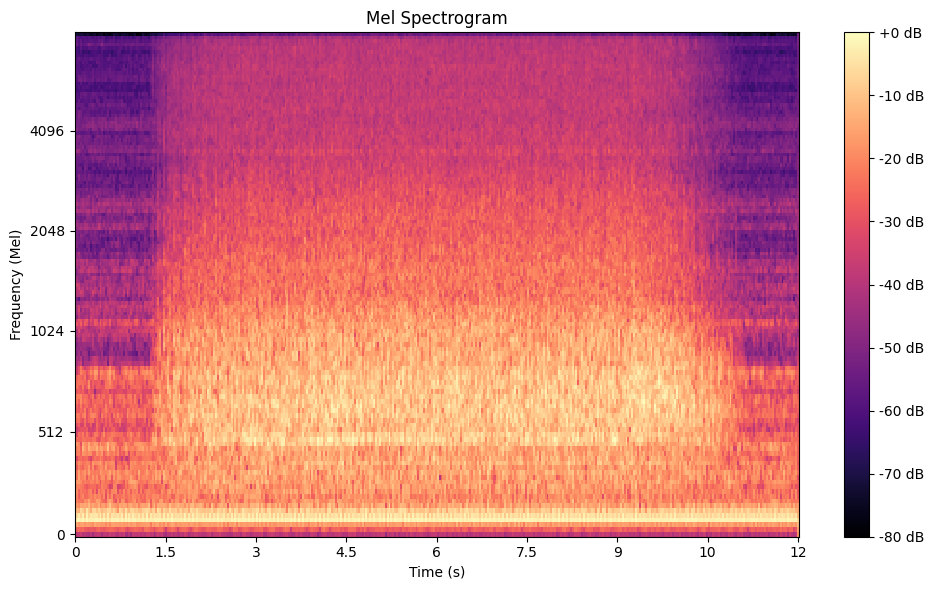

In [90]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(log_mel_spectrogram, sr=sampling_rate, hop_length=hop_size, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Mel)")
plt.tight_layout()
plt.show()

## Autoencoder